In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, Conv1D, AveragePooling1D
print(tf.__version__)

2.3.0


# The Keras functional API

 ## Coding tutorials
 #### [1. Multiple inputs and outputs](#coding_tutorial_1)
 #### [2. Tensors and Variables](#coding_tutorial_2)
 #### [3. Accessing model layers](#coding_tutorial_3)
 #### [4. Freezing layers](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Multiple inputs and outputs

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the acute inflammations dataset

The `acute inflammations` was created by a medical expert as a data set to test the expert system, which will perform the presumptive diagnosis of two diseases of the urinary system. You can find out more about the dataset [here](https://archive.ics.uci.edu/ml/datasets/Acute+Inflammations).

Attribute information:

Inputs:
- Temperature of patient : 35C-42C
- Occurrence of nausea : yes/no
- Lumbar pain : yes/no
- Urine pushing (continuous need for urination) : yes/no
- Micturition pains : yes/no
- Burning of urethra, itch, swelling of urethra outlet : yes/no

Outputs:
- decision 1: Inflammation of urinary bladder : yes/no
- decision 2: Nephritis of renal pelvis origin : yes/no

#### Load the data

In [4]:
# Load the dataset

from sklearn.model_selection import train_test_split

pd_dat = pd.read_csv('data/diagnosis.csv')
dataset = pd_dat.values
pd_dat.shape

(120, 8)

In [5]:
# Build train and test data splits

X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,:6], dataset[:,6:], test_size=0.33)

In [6]:
# Assign training and testing inputs/outputs

temp_train, nocc_train, lumbp_train, up_train, mict_train, bis_train = np.transpose(X_train)
temp_test, nocc_test, lumbp_test, up_test, mict_test, bis_test = np.transpose(X_test)

inflam_train, nephr_train = Y_train[:, 0], Y_train[:, 1]
inflam_test, nephr_test = Y_test[:, 0], Y_test[:, 1]


In [7]:
temp_train

array([41.5, 37.4, 35.9, 40.5, 36.6, 41.1, 41. , 37.6, 39.4, 40.2, 40.9,
       36.2, 37. , 36.8, 36.3, 41.5, 40.2, 37.9, 38.1, 37. , 41.5, 37.3,
       37.2, 36.6, 37.5, 36.6, 40.6, 37.9, 40. , 36.7, 41.2, 38.5, 37.6,
       38.7, 37. , 36. , 37.7, 41.2, 37.5, 37.2, 37.4, 40.7, 37.1, 40.4,
       36.7, 40. , 40. , 40.3, 37.5, 40.6, 37.5, 37. , 41. , 40.6, 41.2,
       40. , 38. , 41. , 37.3, 40.9, 35.9, 41.4, 36.2, 38.9, 37. , 41.5,
       37.3, 37.8, 41.1, 40.7, 40.4, 40. , 37. , 40.1, 37.1, 40.8, 37.8,
       40.7, 36.8, 40. ])

#### Build the model

In [8]:
# Build the input layers

input_shape = (1,)
temperature = Input(shape=input_shape, name = 'temp')
nausea_occurence = Input(shape = input_shape, name="nocc")
lumbar_pain = Input(shape = input_shape, name="lumb")
urine_pushing = Input(shape = input_shape, name="up")
micturition_pains = Input(shape = input_shape, name="mict")
bis = Input(shape = input_shape, name="bis")

In [9]:
# Create a list of all the inputs
list_inputs = [temperature, nausea_occurence, lumbar_pain, urine_pushing, 
               micturition_pains, bis]

In [10]:
# Merge all input features into a single large vector

all_layers = keras.layers.concatenate(list_inputs)


In [11]:
# Use a logistic regression classifier for disease prediction

x = Dense(3,activation='relu')(all_layers)
x = Dense(3, activation='relu')(x)

inflammation_pred = Dense(1, activation='sigmoid', name = 'inflam')(x)

nephritis_pred = Dense(1, activation='sigmoid', name = 'nephr')(x)

In [12]:
# Create a list of all the outputs

list_outputs = [inflammation_pred, nephritis_pred]

In [13]:
# Create the model object

model = keras.Model(inputs = list_inputs, outputs = list_outputs)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
temp (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
nocc (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
lumb (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
up (InputLayer)                 [(None, 1)]          0                                            
_______________________________________________________________________________________

#### Plot the model

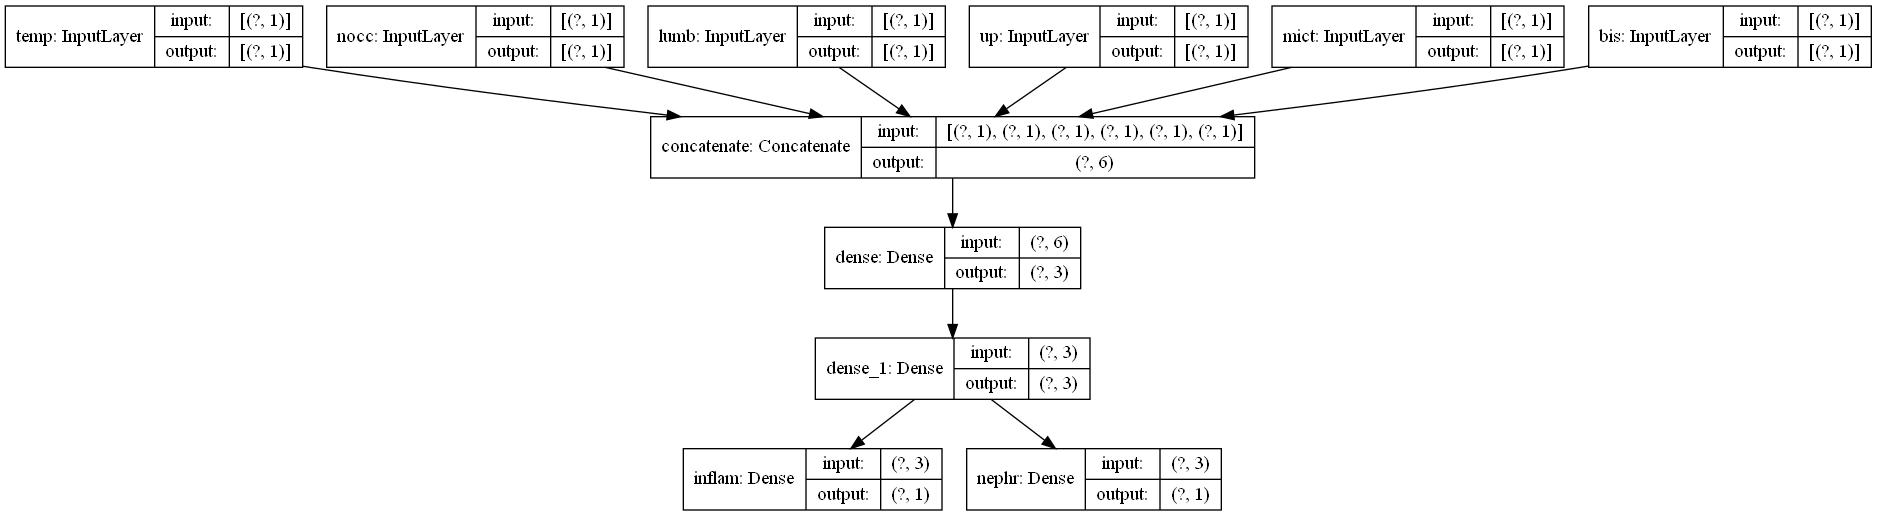

In [14]:
# Display the multiple input/output model
keras.utils.plot_model(model, "model.png", show_shapes=True)


#### Compile the model


In [15]:
# Compile the model
model.compile(optimizer = "adam", loss = ["binary_crossentropy", "binary_crossentropy"], loss_weights=[0.5,0.5], metrics = ['accuracy'])

#### Fit the model 

In [16]:
# Define training inputs and outputs

inputs_train = {'temp': temp_train, 'nocc': nocc_train, 'lumbp': lumbp_train,
                'up': up_train, 'mict': mict_train, 'bis': bis_train}

outputs_train = {'inflam': inflam_train, 'nephr': nephr_train}

In [17]:
# Train the model
history = model.fit(inputs_train, outputs_train, epochs = 1000, verbose = False)

In [18]:
history.history.keys()

dict_keys(['loss', 'inflam_loss', 'nephr_loss', 'inflam_accuracy', 'nephr_accuracy'])

#### Plot the learning curves

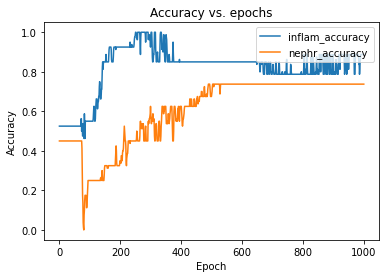

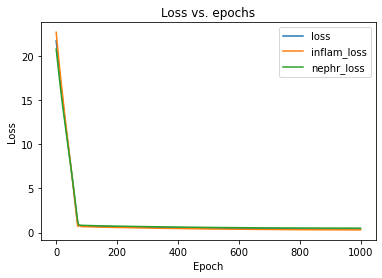

In [19]:
# Plot the training accuracy

acc_keys = [k for k in history.history.keys() if k in ('inflam_accuracy', 'nephr_accuracy')]
loss_keys = [k for k in history.history.keys() if not k in acc_keys]

for k, v in history.history.items():
    if k in acc_keys:
        plt.figure(1)
        plt.plot(v)
    else:
        plt.figure(2)
        plt.plot(v)

plt.figure(1)
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(acc_keys, loc='upper right')

plt.figure(2)
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loss_keys, loc='upper right')

plt.show()

In [20]:
# Evaluate the model

model.evaluate([temp_test, nocc_test, lumbp_test, up_test, mict_test, bis_test],  [inflam_test, nephr_test])

2/2 [==============================] - 0s 6ms/step - loss: 3.4948 - inflam_loss: 3.9339 - nephr_loss: 3.0557 - inflam_accuracy: 0.4750 - nephr_accuracy: 0.3500


[3.4947822093963623,
 3.9338889122009277,
 3.055675745010376,
 0.4749999940395355,
 0.3499999940395355]

***<a id="coding_tutorial_2"></a>
## Tensors and Variables

In [21]:
import numpy as np

#### Create Variable objects

In [22]:
# Create Variable objects of different type with tf.Variable

strings = tf.Variable(["Hello world!"], tf.string)
floats  = tf.Variable([3.14159, 2.71828], tf.float64)
ints = tf.Variable([1, 2, 3], tf.int32)
complexs = tf.Variable([25.9 - 7.39j, 1.23 - 4.91j], tf.complex128)

In [23]:
# Initialise a Variable value

#### Use and modify Variable values

In [24]:
# Use the value of a Variable

v = tf.Variable(2.0)
w = v + 1  # w is a tf.Tensor which is computed based on the value of v.

print(type(w))

<class 'tensorflow.python.framework.ops.EagerTensor'>


In [25]:
# Increment the value of a Variable
v.assign_add(1)
v

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>

In [26]:
# Decrement the value of a Variable
v.assign_sub(2)
v

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>

#### Create Tensor objects

Create a constant tensor and print its type as well as its shape:

In [27]:
# Create a constant Tensor

x = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(x)
print("dtype:", x.dtype)
print("shape:", x.shape)

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)
dtype: <dtype: 'int32'>
shape: (3, 3)


In [28]:
# Obtain the value as a numpy array
x.numpy()


array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [29]:
# Create a Tensor of type float32
tf.constant([[1,2,3]], dtype=tf.float32)


<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[1., 2., 3.]], dtype=float32)>

In [30]:
# Create coefficients

coeffs = np.arange(16)

In [31]:
# Initialise shapes
shape1 = (8,2)
shape2 = (4,4)
shape3 = (2,8)

In [32]:
# Create Tensors of different shape

a = tf.constant(coeffs, shape=shape1)
print("\n a:\n ", a)

b = tf.constant(coeffs, shape=shape2)
print("\n b:\n ", b)

c = tf.constant(coeffs, shape=shape3)
print("\n c:\n ", c)


 a:
  tf.Tensor(
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]], shape=(8, 2), dtype=int32)

 b:
  tf.Tensor(
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]], shape=(4, 4), dtype=int32)

 c:
  tf.Tensor(
[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]], shape=(2, 8), dtype=int32)


#### Useful Tensor operations

In [33]:
# Create a constant Tensor

t = tf.constant(np.arange(80), shape=[5,2,8])

In [34]:
# Get the rank of a Tensor

rank = tf.rank(t)

In [35]:
# Display the rank

print("rank: ", rank)

rank:  tf.Tensor(3, shape=(), dtype=int32)


In [36]:
# Reshape a Tensor
t2 = tf.reshape(t, (10,8))

In [37]:
# Display the new shape
print("t2.shape: ", t2.shape)

t2.shape:  (10, 8)


In [38]:
# Create ones, zeros, identity and constant Tensors
ones = tf.ones(shape=(1,3))
zeros = tf.zeros((1,2))
eye = tf.eye(2,2)
tensor7 = tf.constant(7, shape=(3,3))

In [39]:
# Display the created tensors

print("\n Ones:\n ", ones)
print("\n Zeros:\n ", zeros)
print("\n Identity:\n ", eye)
print("\n Tensor filled with 7: ", tensor7)


 Ones:
  tf.Tensor([[1. 1. 1.]], shape=(1, 3), dtype=float32)

 Zeros:
  tf.Tensor([[0. 0.]], shape=(1, 2), dtype=float32)

 Identity:
  tf.Tensor(
[[1. 0.]
 [0. 1.]], shape=(2, 2), dtype=float32)

 Tensor filled with 7:  tf.Tensor(
[[7 7 7]
 [7 7 7]
 [7 7 7]], shape=(3, 3), dtype=int32)


In [40]:
# Create a ones Tensor and a zeros Tensor

t1 = tf.ones(shape=(2, 2))
t2 = tf.zeros(shape=(2, 2))

In [41]:
# Concatentate two Tensors

concat0 = tf.concat([t1, t2], axis = 0)
concat1 = tf.concat([t1, t2], axis = 1)

In [42]:
# Display the concatenated tensors

print(concat0)
print(concat1)

tf.Tensor(
[[1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]], shape=(4, 2), dtype=float32)
tf.Tensor(
[[1. 1. 0. 0.]
 [1. 1. 0. 0.]], shape=(2, 4), dtype=float32)


In [43]:
# Create a constant Tensor

t = tf.constant(np.arange(24), shape=(3, 2, 4))
print("\n t shape: ", t.shape)


 t shape:  (3, 2, 4)


In [44]:
# Expanding the rank of Tensors
t1 = tf.expand_dims(t, axis=0)
t2 = tf.expand_dims(t, axis=1)
t3 = tf.expand_dims(t, axis=2)

In [45]:
# Display the shapes after tf.expand_dims

print(f"\n After expanding dims:\n t1 shape:  {t1.shape} \n t2 shape: {t2.shape} \n t3 shape:  {t3.shape}")


 After expanding dims:
 t1 shape:  (1, 3, 2, 4) 
 t2 shape: (3, 1, 2, 4) 
 t3 shape:  (3, 2, 1, 4)


In [46]:
# Squeezing redundant dimensions
t1 = tf.squeeze(t1, axis=0)
t2 = tf.squeeze(t2, axis=1)
t3 = tf.squeeze(t3, axis=2)

In [47]:
# Display the shapes after tf.squeeze

print(f"\n After expanding dims:\n t1 shape:  {t1.shape} \n t2 shape: {t2.shape} \n t3 shape:  {t3.shape}")


 After expanding dims:
 t1 shape:  (3, 2, 4) 
 t2 shape: (3, 2, 4) 
 t3 shape:  (3, 2, 4)


In [48]:
# Slicing a Tensor
x = tf.constant(np.arange(10))
x[:-2]

<tf.Tensor: shape=(8,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7])>

#### Doing maths with Tensors

In [49]:
# Create two constant Tensors

c = tf.constant([[1.0, 2.0], [3.0, 4.0]])
d = tf.constant([[1.0, 1.0], [0.0, 1.0]])

In [50]:
# Matrix multiplication

matmul_cd = tf.matmul(c, d)

In [51]:
# Display the result

print(f"\n tf.matmul(c,d):\n {matmul_cd}")


 tf.matmul(c,d):
 [[1. 3.]
 [3. 7.]]


In [52]:
# Elementwise operations



In [53]:
# Display the results

print("\n c*d:\n", c*d)
print("\n c+d:\n", c + d)
print("\n c-d:\n", c-d)
print("\n c/c:\n", c/d)


 c*d:
 tf.Tensor(
[[1. 2.]
 [0. 4.]], shape=(2, 2), dtype=float32)

 c+d:
 tf.Tensor(
[[2. 3.]
 [3. 5.]], shape=(2, 2), dtype=float32)

 c-d:
 tf.Tensor(
[[0. 1.]
 [3. 3.]], shape=(2, 2), dtype=float32)

 c/c:
 tf.Tensor(
[[ 1.  2.]
 [inf  4.]], shape=(2, 2), dtype=float32)


In [54]:
# Create Tensors

a = tf.constant([[2, 3], [3, 3]])
b = tf.constant([[8, 7], [2, 3]])
x = tf.constant([[-6.89 + 1.78j], [-2.54 + 2.15j]])

##%% md

#### Randomly sampled constant tensors

In [55]:
# Create a Tensor with samples from a Normal distribution

tf.random.normal((2,3))

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 0.19012715, -0.17291018, -0.73301804],
       [-0.09234857,  1.197367  ,  0.25586084]], dtype=float32)>

In [56]:
# Create a Tensor with samples from a Uniform distribution
tf.random.uniform((2,3))


<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.31677806, 0.08724916, 0.810591  ],
       [0.64606285, 0.24070394, 0.8489027 ]], dtype=float32)>

In [57]:
# Create a Tensor with samples from a Poisson distribution
tf.random.poisson((2,3), 5)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[5., 3., 6.],
       [5., 4., 2.]], dtype=float32)>

***
<a id="coding_tutorial_3"></a>
## Accessing model layers

In [58]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the pre-trained model

In this section, we aim to demonstrate accessing layer attributes within a model.

Let's get started by loading the `VGG19` pre-trained model from the `keras.applications` library, which is a very deep network trained on more than a million images from the ImageNet database. The network is trained to classify images into 1000 object categories.

In [59]:
# Load the VGG19 model

vgg_model = keras.applications.VGG19()


574717952/574710816 [==============================] - 120s 0us/step

In [60]:
# Get the inputs, layers and display the summary

vgg_input = vgg_model.input
vgg_layers = vgg_model.layers
vgg_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [66]:
vgg_layers[0] #, vgg_input

<tf.Tensor 'input_1:0' shape=(None, 224, 224, 3) dtype=float32>

#### Build a model to access the layer outputs

In [63]:
from tensorflow.keras.models import Model

In [67]:
# Build a model that returns the layer outputs

features = Model(vgg_input, [layers.output for layers in vgg_layers])

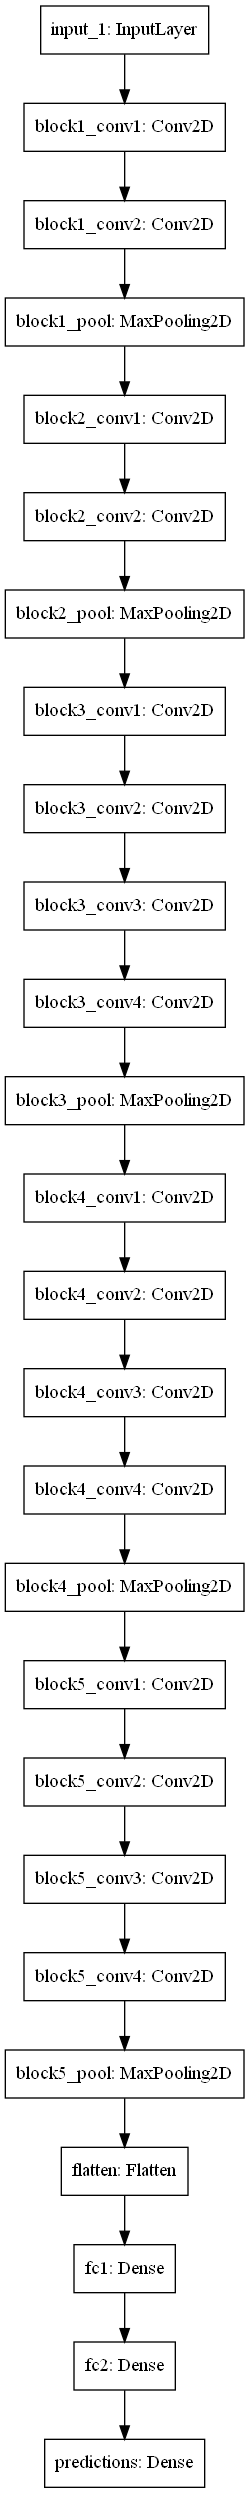

In [68]:
# Plot the model
keras.utils.plot_model(features, 'VGG19.png')


In [77]:
# Test the model on a random input

ffeature_check = features(np.random.random((1, 224, 224, 3)).astype('float32'))

#### Load the 'cool cat' picture

In Zambia’s South Luangwa National Park, a photographer had been watching a pride of lions while they slept off a feast from a buffalo kill. When this female walked away, he anticipated that she might be going for a drink and so he positioned his vehicle on the opposite side of the waterhole. The `cool cat` picture is one of the highly commended 2018 Image from Wildlife Photographer of the Year.

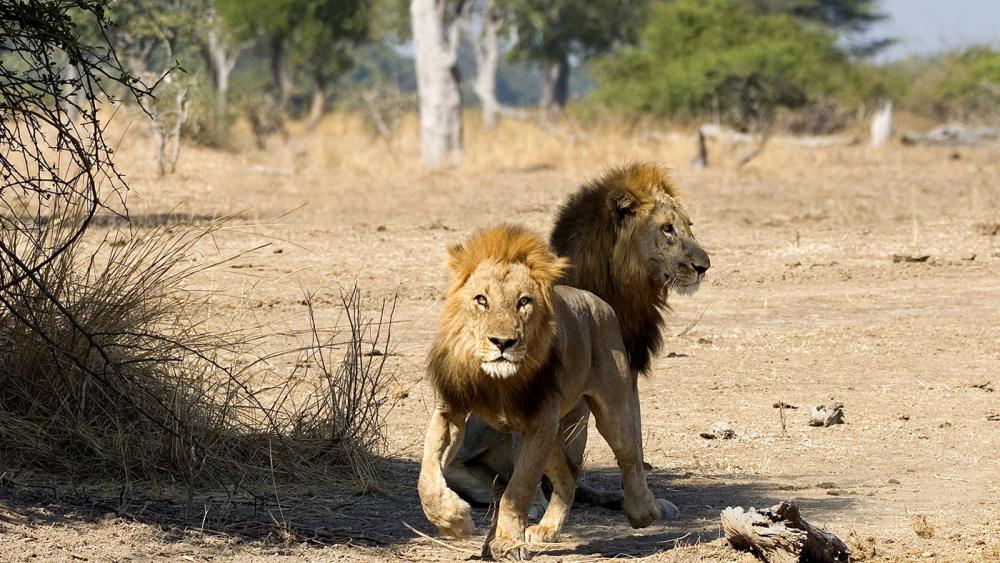

In [78]:
# Display the original image

import IPython.display as display
from PIL import Image

display.display(Image.open('Data/cat.jpg'))

#### Visualise network features from the input image

In [79]:
# Preprocess the image

from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image

img_path = 'data/cat.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [81]:
# Extract the features
extracted_features = features(x)


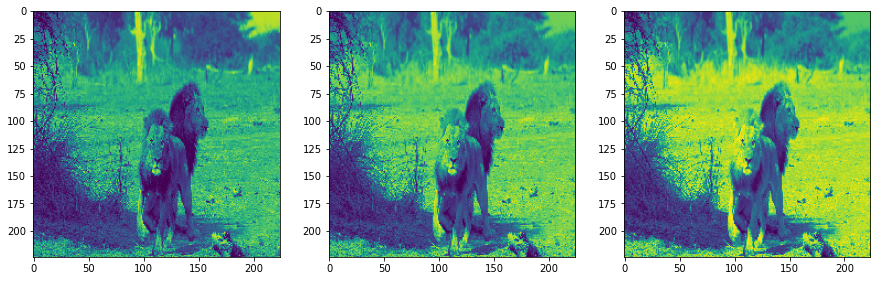

In [87]:
# Visualise the input channels
input_channel = extracted_features[0]
plt.figure(figsize=(15,7))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(input_channel[0, :,  :,i])
plt.show()

In [90]:
input_channel.shape[-1]

3

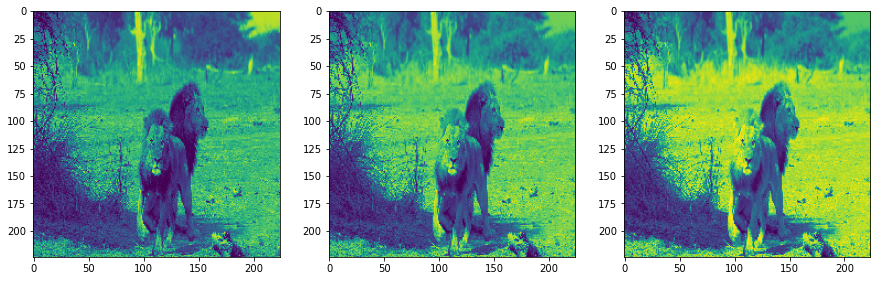

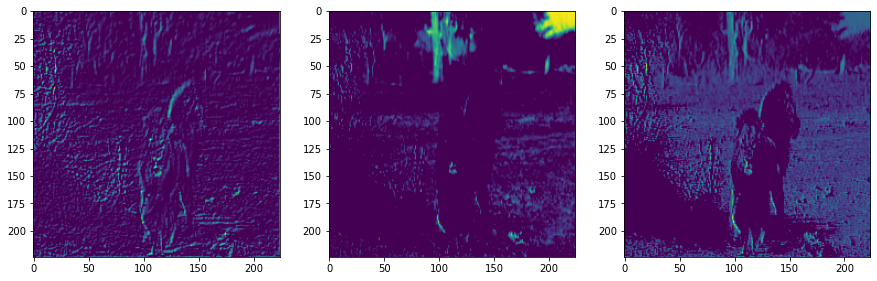

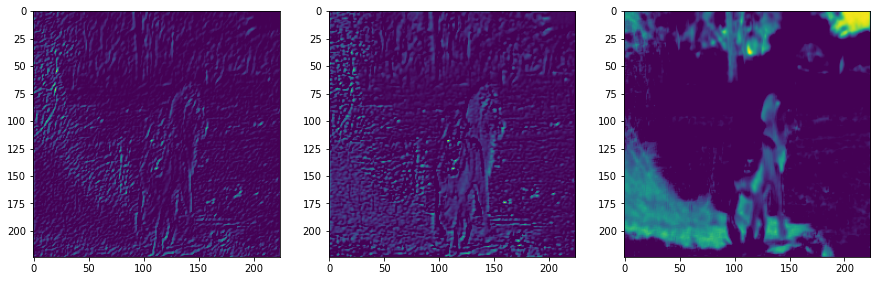

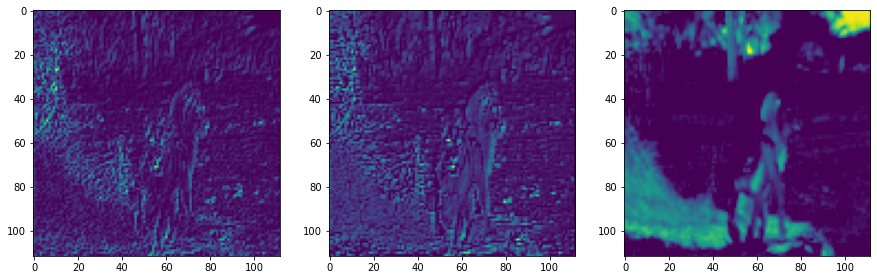

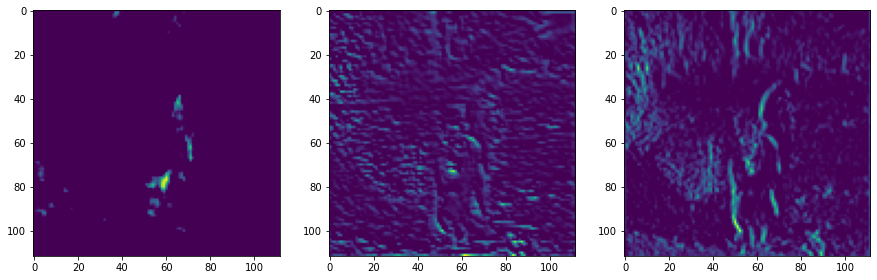

In [91]:
# Visualise some features in the first hidden layer
for hidden_layers in range(len(extracted_features)-6):
    input_channel = extracted_features[hidden_layers]
    plt.figure(figsize=(15,7))
    for i in range(3):
        plt.subplot(1,3,i+1)
        plt.imshow(input_channel[0, :,  :,i])

    if hidden_layers==5:
        break
    plt.show()

In [98]:
# Build a model to extract features by layer name
input_channel = features.get_layer('block4_conv4').output

temp_model = Model(features.input, features.get_layer('block4_conv4').output)
input_channel  = temp_model.predict(x)

plt.figure(figsize=(15,7))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(input_channel[0, :,  :,i])
plt.show()

In [100]:
input_channel.shape

(1, 28, 28, 512)

In [113]:
# Visualise some features from the extracted layer output


plt.figure(figsize=(15,7))
for i in range(16):
    plt.subplot(4,4,i+1)
    channel_no =  np.random.choice(list(range(1,input_channel.shape[-1])), 1)
    plt.imshow(input_channel[0, :,  :,channel_no[0]])
    plt.axis('off')
plt.subplots_adjust(wspace = 0.01, hspace =0.1)

***
<a id="coding_tutorial_4"></a>
## Freezing layers

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Build the model

In [11]:
# Build a small Sequential model

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential([
    layers.Dense(4, input_shape=(4,), activation='relu', kernel_initializer='random_uniform',
                 bias_initializer='ones'),
    layers.Dense(2, activation='relu', kernel_initializer='lecun_normal', bias_initializer='ones'),
    layers.Dense(4, activation='softmax'),
])

In [12]:
# Display the model summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 12        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


#### Examine the weight matrix variation over training

In [18]:
# Retrieve the weights and biases
def get_weights(model):
    return [layer.weights[0].numpy() for layer in model.layers]

def get_bias(model):
    return [layer.weights[1].numpy() for layer in model.layers]

W0_layers = get_weights(model)
b0_layers = get_bias(model)

In [19]:
# Construct a synthetic dataset

x_train = np.random.random((100, 4))
y_train = x_train

x_test = np.random.random((20, 4))
y_test = x_test

In [20]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [21]:
# Retrieve weights and biases

W1_layers = get_weights(model)
b1_layers = get_bias(model)

In [24]:
# Plot the variation
def plot_variation(W1_layers, W0_layers, b0_layers, b1_layers):
    plt.figure(figsize=(8,8))
    for n in range(3):
        delta_l = W1_layers[n] - W0_layers[n]
        print('Layer '+str(n)+': bias variation: ', np.linalg.norm(b1_layers[n] - b0_layers[n]))
        ax = plt.subplot(1,3,n+1)
        plt.imshow(delta_l)
        plt.title('Layer '+str(n))
        plt.axis('off')
    plt.colorbar()
    plt.suptitle('Weight matrices variation')

plot_variation(W1_layers, W0_layers, b0_layers, b1_layers)

Layer 0: bias variation:  0.039773893
Layer 1: bias variation:  0.039616097
Layer 2: bias variation:  0.093154624


#### Freeze layers at build time

In [25]:
# Count the trainable and non trainable variables before the freezing

n_trainable_variables = len(model.trainable_variables)
n_non_trainable_variables = len(model.non_trainable_variables)

In [26]:
# Display the number of trainable and non trainable variables before the freezing

print("\n Before freezing:\n\t Number of trainable variables: ", n_trainable_variables,
                         "\n\t Number of non trainable variables: ", n_non_trainable_variables)


 Before freezing:
	 Number of trainable variables:  6 
	 Number of non trainable variables:  0


In [37]:
# Build the model

model = Sequential([
    layers.Dense(4, input_shape=(4,), activation='relu', kernel_initializer='random_uniform',
                 bias_initializer='ones', trainable=False),
    layers.Dense(2, activation='relu', kernel_initializer='lecun_normal', bias_initializer='ones'),
    layers.Dense(4, activation='softmax'),
])


In [38]:
# Count the trainable and non trainable variables after the freezing


n_trainable_variables = len(model.trainable_variables)
n_non_trainable_variables = len(model.non_trainable_variables)


In [39]:
# Display the number of trainable and non trainable variables after the freezing

print("\n After freezing:\n\t Number of trainable variables: ", n_trainable_variables,
                         "\n\t Number of non trainable variables: ", n_non_trainable_variables)


 After freezing:
	 Number of trainable variables:  4 
	 Number of non trainable variables:  2


In [40]:
# Retrieve weights and biases
W0_layers = get_weights(model)
b0_layers = get_bias(model)

In [41]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [42]:
# Retrieve weights and biases

W1_layers = get_weights(model)
b1_layers = get_bias(model)

Layer 0: bias variation:  0.0
Layer 1: bias variation:  0.22798073
Layer 2: bias variation:  0.37519988


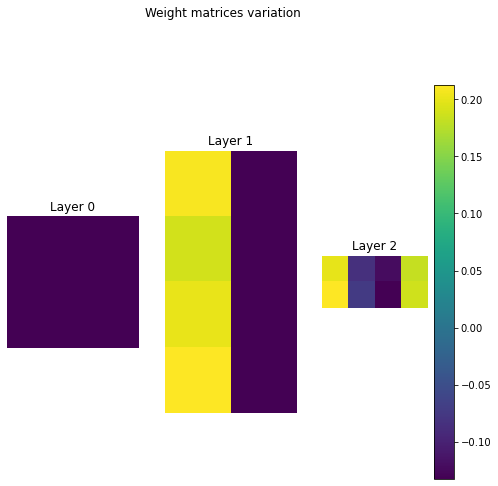

In [43]:
# Plot the variation
plot_variation(W1_layers, W0_layers, b0_layers, b1_layers)


#### Freeze layers of a pre-built model

In [44]:
# Count the trainable and non trainable variables before the freezing

print("\n Before freezing:\n\t Number of trainable variables: ", len(model.trainable_variables),
                         "\n\t Number of non trainable variables: ", len(model.non_trainable_variables))


 Before freezing:
	 Number of trainable variables:  4 
	 Number of non trainable variables:  2


In [45]:
# Freeze the second layer
model.layers[1].trainable =False


In [46]:
# Count the trainable and non trainable variables after the freezing

print("\n After freezing:\n\t Number of trainable variables: ", len(model.trainable_variables),
                        "\n\t Number of non trainable variables: ", len(model.non_trainable_variables))


 After freezing:
	 Number of trainable variables:  2 
	 Number of non trainable variables:  4


In [47]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [48]:
# Retrieve weights and biases


W2_layers = get_weights(model)
b2_layers = get_bias(model)

Layer 0: bias variation:  0.0
Layer 1: bias variation:  0.0
Layer 2: bias variation:  0.24834108


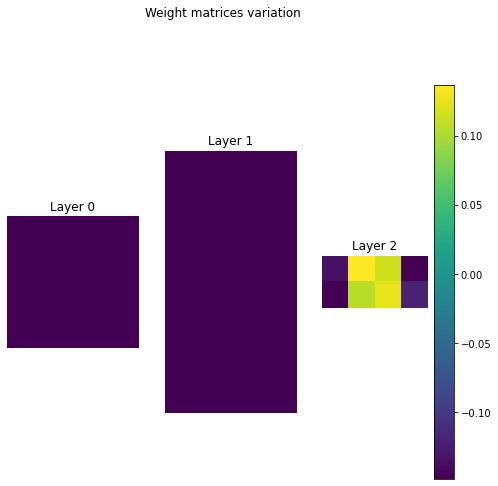

In [49]:
# Plot the variation

plot_variation(W1_layers, W2_layers, b1_layers, b2_layers)
